<a href="https://colab.research.google.com/github/Stella-Achar-Oiro/LP1-Data-Analysis-Project-2/blob/main/Stella_Lp2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Details
Name : Stella Achar Oiro <br>
email: stella.achar@azubiafrica.org <br>
Team: Prague <br>
Link to Github Repo - ([GitHub](https://github.com/Stella-Achar-Oiro/LP1-Data-Analysis-Project-2))
Project - Regression



# Intro
## Background
**The Goal** - We will use time series forecasting to build a model that accurately predicts the store sales of thousands of items sold by Corporación Favorita, an Ecuadorian based grocery store, at different stores. We will use machine learning on a data set that includes information on stores, dates, promotions among other data.

<br>

**The Context and Impact** - Forecasts can help modern grocery stores by guiding on how much inventory to buy over time so as to avoid overstocking and perishing of goods or understocking which leads to loss of revenue and disatisfied customers. More accurate prediction for this project can help in a real world model that helps to decrease food waste from overstocking and also improve customer satisfaction by avoiding understocking.

<br>

**Evaluation Metric** The the Root Mean Squared Log Error (RMSLE) will be used to evaluate the models.

**Data Description** 
- Train and test data consist of time series features store_nbr, family, and onpromotion as well as the target sales.
- Stores data - metadata, including city, state, type, and cluster.
- Oil data - daily oil price. 
- holidays_events - holidays and events with metadata.

# Research Questions and Hypothesis

The project adopts the following research hypothesis:

**Null Hypothesis:** There is no statistically significant relationship between the day of the week and the sales of Corporation Favorita's main products, so it cannot be used for reliable sales forecasting. 

<br>

**Alternative Hypothesis:** There is a strong positive correlation between the day of the week and the sales of Corporation Favorita's main products, even in the presence of holidays and extreme events. Therefore, it can be used to make reliable forecasts regarding sales.

<br>

##Research Questions:
The project will attempt to answer the following questions:

1. What is the impact of promotional campaigns on sales over the next two weeks?
2. How do customer preferences and behavior differ between different regions?
3. Is there a correlation between weather and product sales?
4. What factors influence the purchase of products during holidays or special events?
5.	Is it possible to predict the sales for products for the next 2 weeks and with what precision/accuracy?
6.	Which is the most preferred day for people buying products and what is the trend throughout the week/month?
7.	Do holidays and other events affect the usual/normal sales trend during the week and to what effect?
8.	How do the sales of the items vary across different stores?
9.	What is the overall trend of sales for the items over time?
10.	How do promotions affect the sales of the items?
11.	How do different products perform in terms of sales across different stores?
12.	Are there any seasonal patterns in the sales of the items?
13.	Are there any specific stores or products that have consistently high or low sales?
14.	How does the sales of the items compare across different date ranges?
15.	Are there any correlation between the store, product, promotion and sales?
16.	How do the sales of the items vary across different departments in the store?
17.	Are there any outliers in the sales data that may require further investigation?

# Setup


## Installation

In [ ]:
# Installing and Importing the required packages.
!pip install jovian numpy pandas matplotlib==3.1.1 plotly seaborn opendatasets scikit-learn  --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 26.8 MB/s eta 0:00:00


## Importation
Importing all the packages/libraries that will be used through this notebook.

In [ ]:
# Importing all the packages/libraries that will be used through this notebook.
import opendatasets as od
import os
import joblib

import numpy as np
import pandas as pd
from datetime import datetime, date

import matplotlib
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import missingno as msno


%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 

# Data Loading
Loading the datasets (train, eval, test) and the additional files

In [ ]:
# For CSV, use pandas.read_csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading all datasets
df_holidays_events = pd.read_csv('/content/drive/MyDrive/LP2/holidays_events.csv',parse_dates=["date"])
df_oil = pd.read_csv('/content/drive/MyDrive/LP2/oil.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/LP2/stores.csv')
df_test = pd.read_csv('/content/drive/MyDrive/LP2/test.csv',index_col=["id"],parse_dates=["date"])
df_train = pd.read_csv('/content/drive/MyDrive/LP2/train.csv',index_col=["id"],parse_dates=["date"])
df_transactions = pd.read_csv('/content/drive/MyDrive/LP2/transactions.csv',parse_dates=["date"])
df_sample_submission = pd.read_csv('/content/drive/MyDrive/LP2/sample_submission.csv')

# **Exploratory Data Analysis:** EDA

## Univariate Analysis and Multivariate Analysis

**df_train**

In [ ]:
# Display first 5 rows of the data
df_train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [ ]:
# Get the summary statistics of the data
df_train.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [ ]:
df_train.shape

(3000888, 5)

In [ ]:
df_train.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [ ]:
df_train.date.min(),df_train.date.max(),df_train.date.max()-df_train.date.min()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-08-15 00:00:00'),
 Timedelta('1687 days 00:00:00'))

In [ ]:
family_dict = {}
for i in list(df_train.family.unique()):
    family_dict[i] =  i.replace(" ","_")
df_train["family"] = df_train["family"].replace(family_dict)
df_train.family.unique()

array(['AUTOMOTIVE', 'BABY_CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN_FOODS', 'GROCERY_I', 'GROCERY_II', 'HARDWARE',
       'HOME_AND_KITCHEN_I', 'HOME_AND_KITCHEN_II', 'HOME_APPLIANCES',
       'HOME_CARE', 'LADIESWEAR', 'LAWN_AND_GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL_CARE',
       'PET_SUPPLIES', 'PLAYERS_AND_ELECTRONICS', 'POULTRY',
       'PREPARED_FOODS', 'PRODUCE', 'SCHOOL_AND_OFFICE_SUPPLIES',
       'SEAFOOD'], dtype=object)

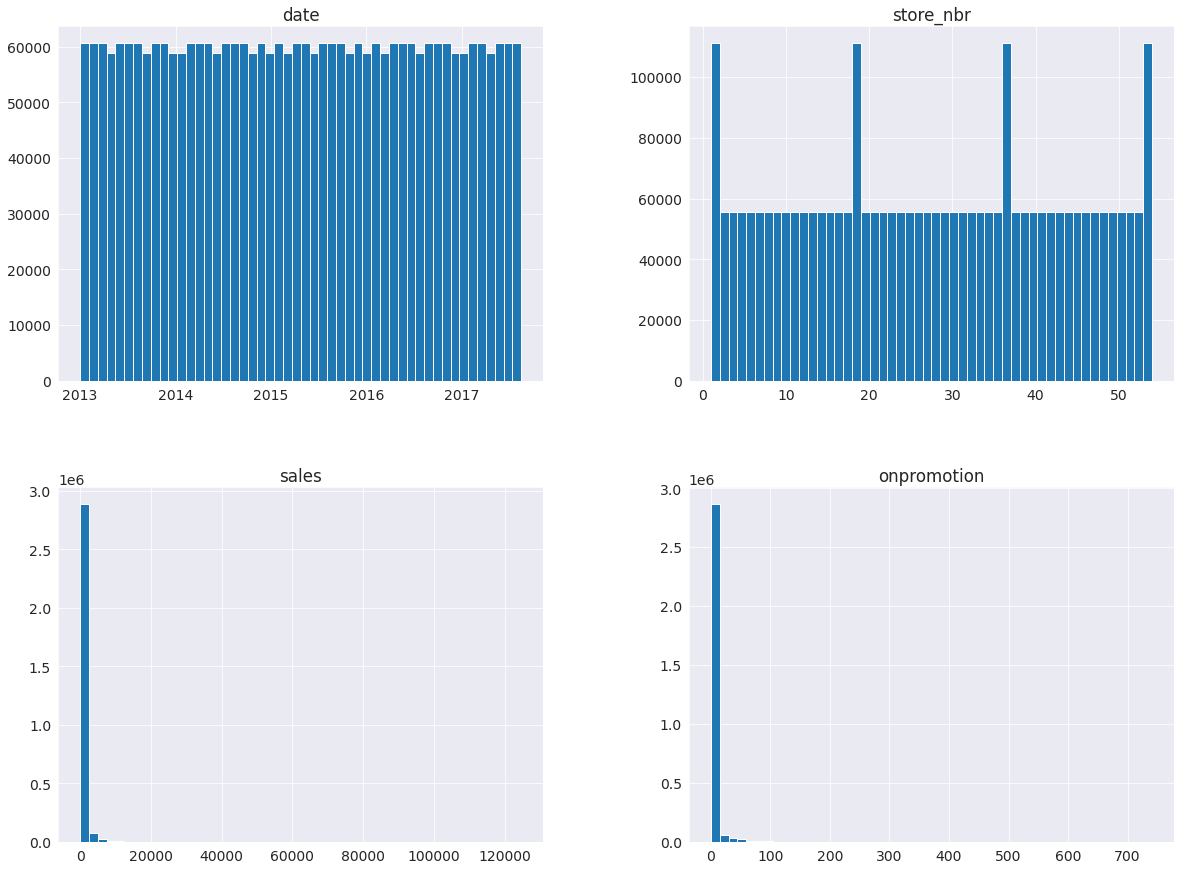

In [ ]:
# Plot histograms for each numerical feature
df_train.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-11-6d2ad45a44a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


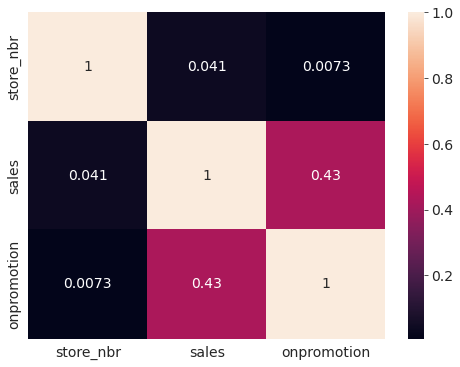

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_train.corr(), annot=True)
plt.show()

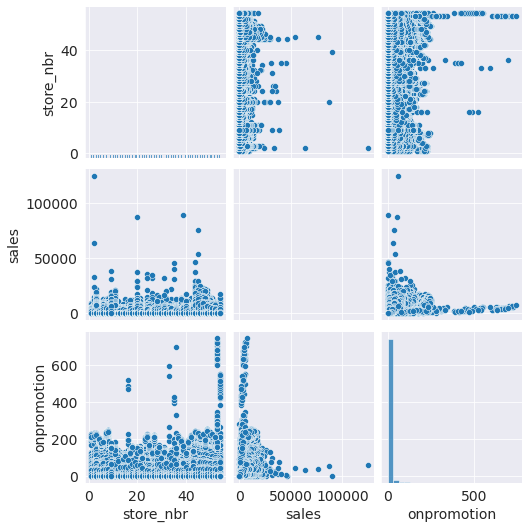

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df_train)
plt.show()

**df_oil**

In [ ]:
# Display first 5 rows of the data
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
# Get the summary statistics of the data
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [ ]:
df_oil.shape

(1218, 2)

In [ ]:
df_oil.dtypes

date           object
dcoilwtico    float64
dtype: object

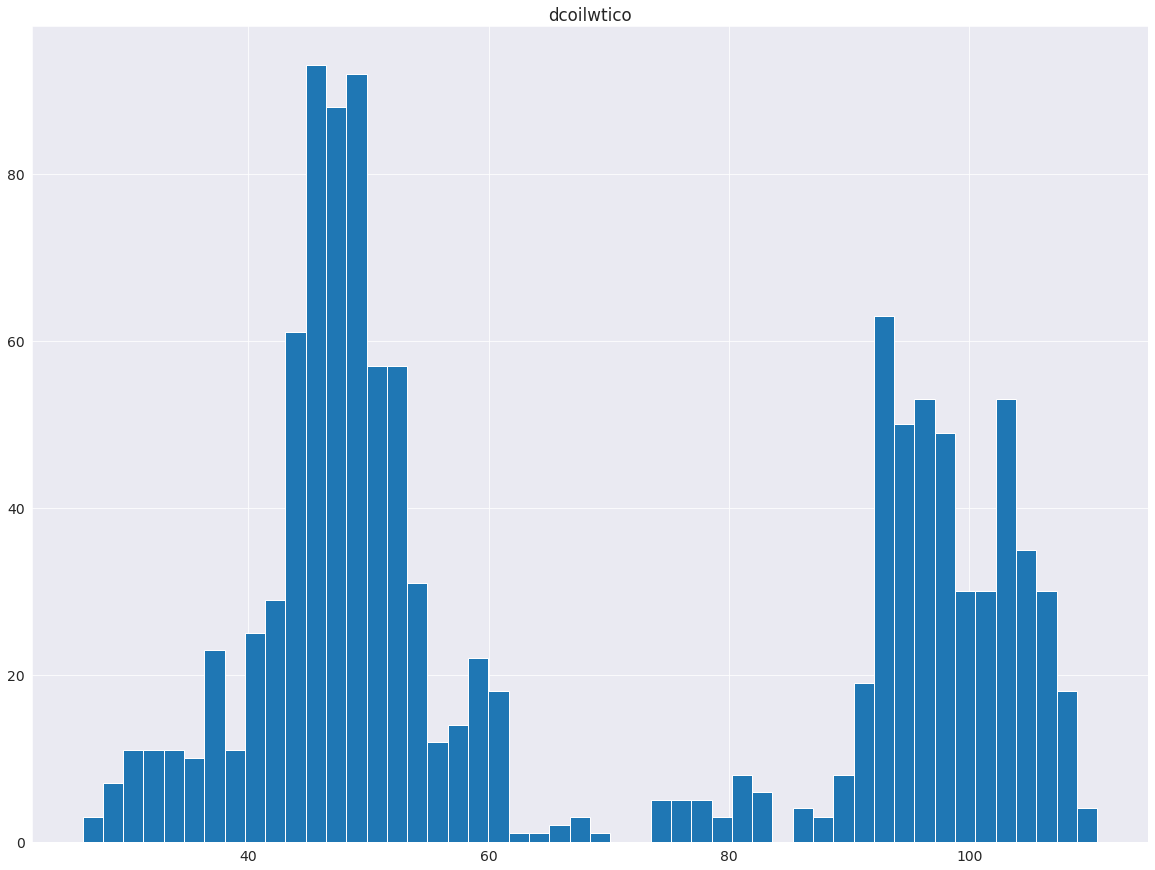

In [ ]:
# Plot histograms for each numerical feature
df_oil.hist(bins=50, figsize=(20,15))
plt.show()

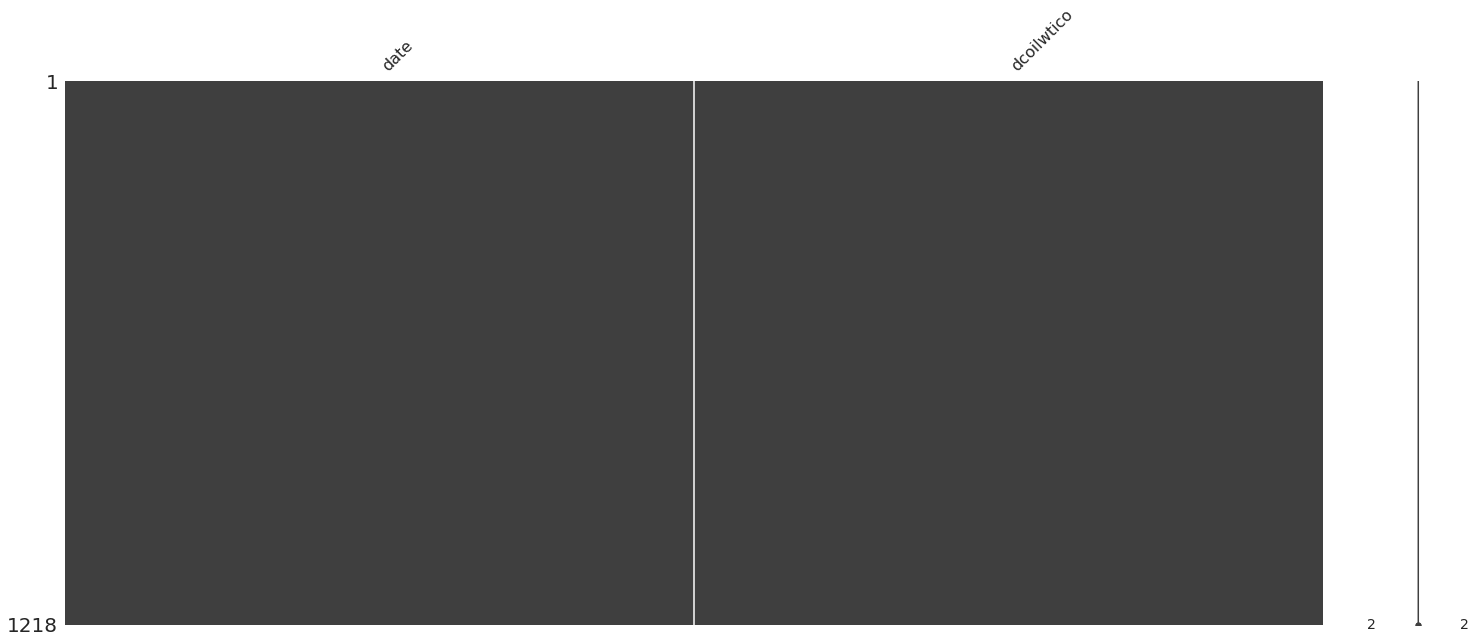

In [ ]:
msno.matrix(df_oil);

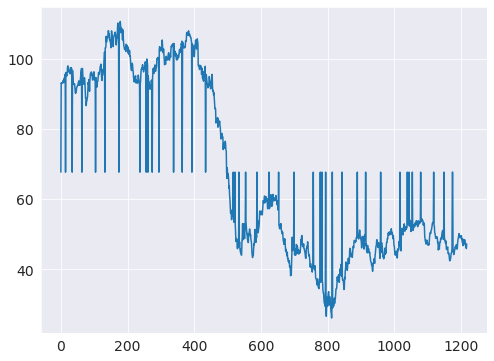

In [ ]:
df_oil.dcoilwtico.plot()

<ipython-input-19-6928e7c6439d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_oil.corr(), annot=True)


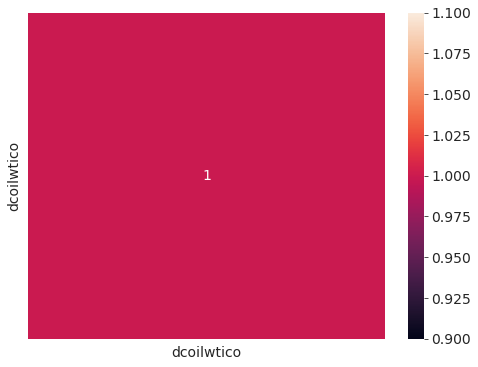

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_oil.corr(), annot=True)
plt.show()

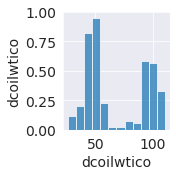

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df_oil)
plt.show()

**df_stores**

In [ ]:
# Display first 5 rows of the data
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
# Get the summary statistics of the data
df_stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [ ]:
df_stores.shape

(54, 5)

In [ ]:
df_stores.dtypes

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

In [ ]:
df_stores.rename(columns={"type":"store_type"},inplace=True)

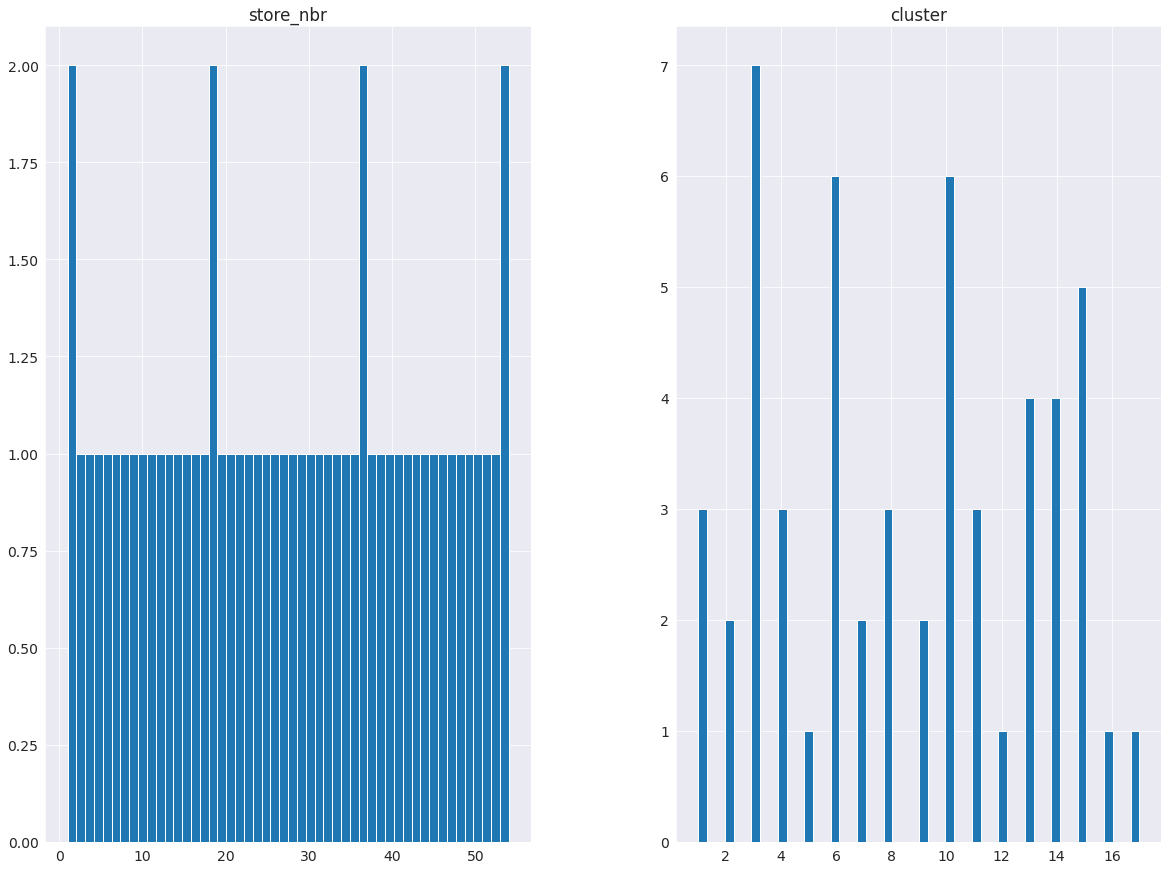

In [ ]:
# Plot histograms for each numerical feature
df_stores.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-27-6954644d99a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_stores.corr(), annot=True)


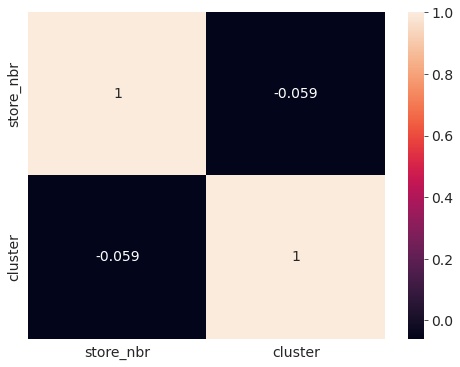

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_stores.corr(), annot=True)
plt.show()

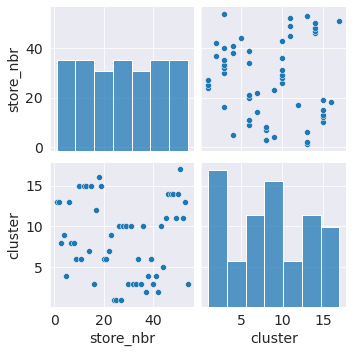

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df_stores)
plt.show()

**df_holidays_events**

In [ ]:
# Display first 5 rows of the data
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [ ]:
# Get the summary statistics of the data
df_holidays_events.describe()

<ipython-input-31-c1689171e403>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_holidays_events.describe()


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_holidays_events.shape

(350, 6)

In [ ]:
df_holidays_events.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

In [ ]:
df_holidays_events.rename(columns={"locale_name":"city","type":"holiday_type"},inplace=True)

In [ ]:
df_holidays_events.drop(columns="description", inplace=True)

In [ ]:
df_holidays_events.holiday_type.value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: holiday_type, dtype: int64

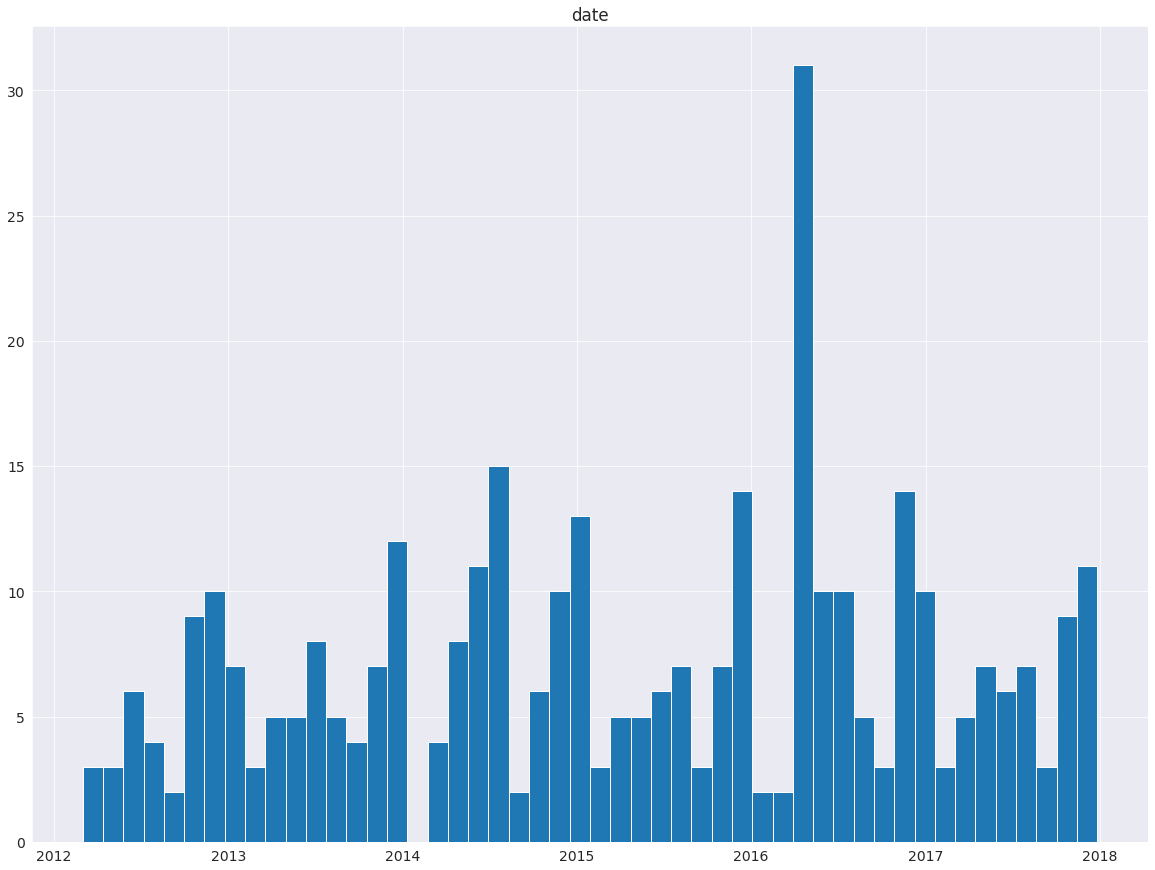

In [ ]:
# Plot histograms for each numerical feature
df_holidays_events.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-93-5cd85d82f420>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_holidays_events.corr(), annot=True)


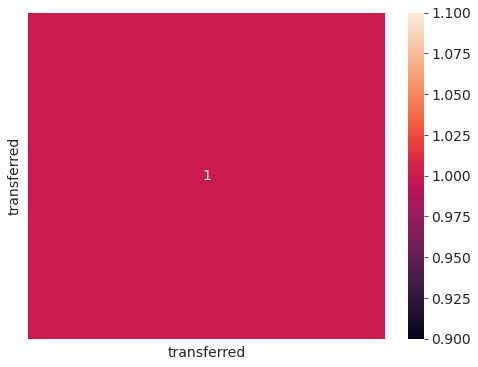

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_holidays_events.corr(), annot=True)
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


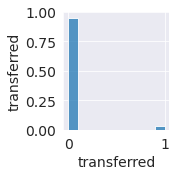

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df_holidays_events)
plt.show()

**df_test**

In [ ]:
# Display first 5 rows of the data
df_test.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 3000888 to 3029399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28512 non-null  datetime64[ns]
 1   store_nbr    28512 non-null  int64         
 2   family       28512 non-null  object        
 3   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
# Get the summary statistics of the data
df_test.describe()

,store_nbr,onpromotion
count,28512.000000,28512.000000
mean,27.500000,6.965383
std,15.586057,20.683952
min,1.000000,0.000000
25%,14.000000,0.000000
50%,27.500000,0.000000
75%,41.000000,6.000000
max,54.000000,646.000000


In [ ]:
df_test.shape

(28512, 4)

In [ ]:
df_test.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
onpromotion             int64
dtype: object

In [ ]:
df_test["family"] = df_test["family"].replace(family_dict)
df_test.family.unique()

array(['AUTOMOTIVE', 'BABY_CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN_FOODS', 'GROCERY_I', 'GROCERY_II', 'HARDWARE',
       'HOME_AND_KITCHEN_I', 'HOME_AND_KITCHEN_II', 'HOME_APPLIANCES',
       'HOME_CARE', 'LADIESWEAR', 'LAWN_AND_GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL_CARE',
       'PET_SUPPLIES', 'PLAYERS_AND_ELECTRONICS', 'POULTRY',
       'PREPARED_FOODS', 'PRODUCE', 'SCHOOL_AND_OFFICE_SUPPLIES',
       'SEAFOOD'], dtype=object)

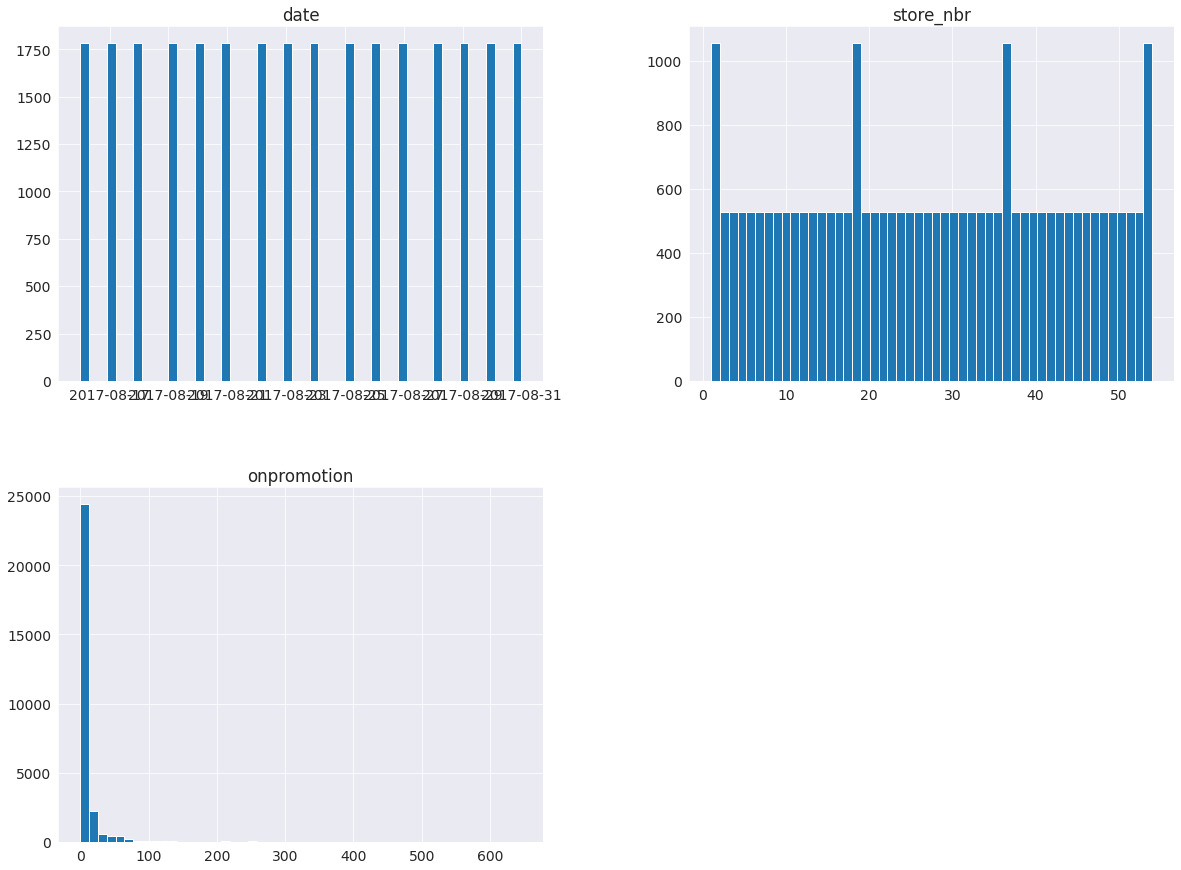

In [ ]:
# Plot histograms for each numerical feature
df_test.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-43-3460fdb6058e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_test.corr(), annot=True)


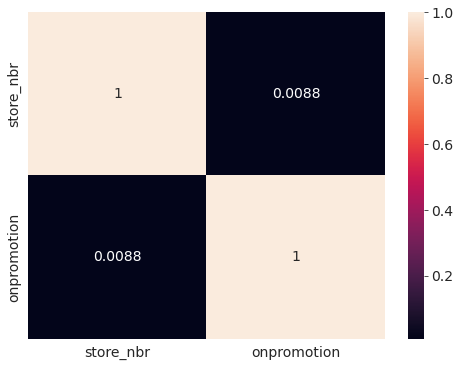

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_test.corr(), annot=True)
plt.show()

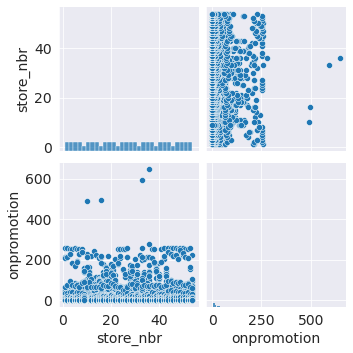

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df_test)
plt.show()

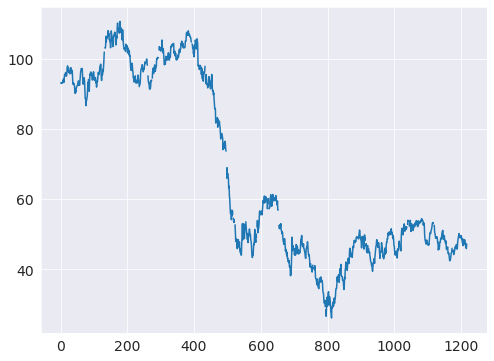

In [ ]:
df_oil.dcoilwtico.plot()

**df_transactions**

In [ ]:
# Display first 5 rows of the data
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [ ]:
# Get the summary statistics of the data
df_transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [ ]:
df_transactions.shape

(83488, 3)

In [ ]:
df_transactions.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

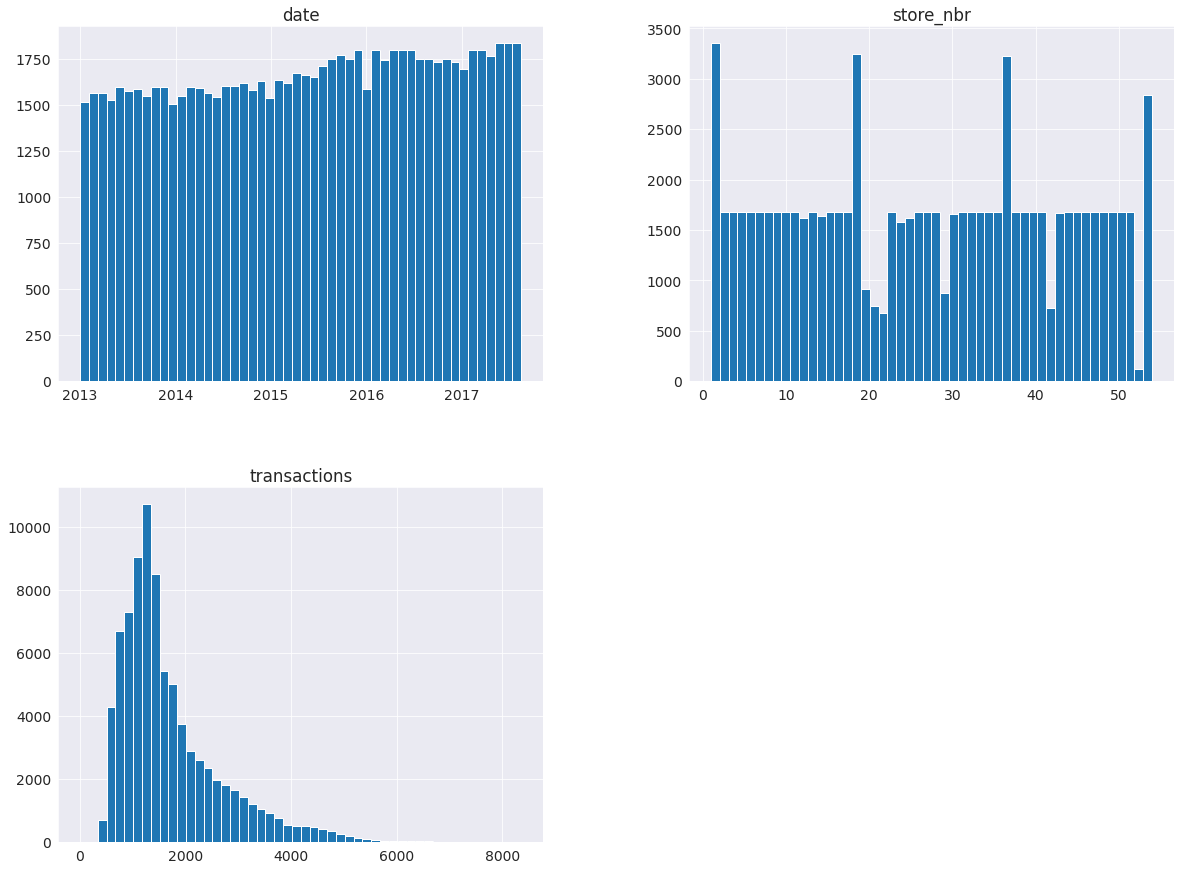

In [ ]:
# Plot histograms for each numerical feature
df_transactions.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-52-39770069cd02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_transactions.corr(), annot=True)


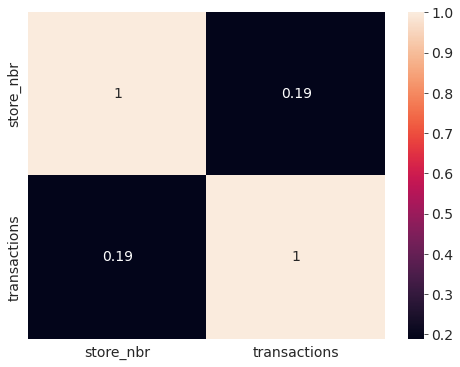

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_transactions.corr(), annot=True)
plt.show()

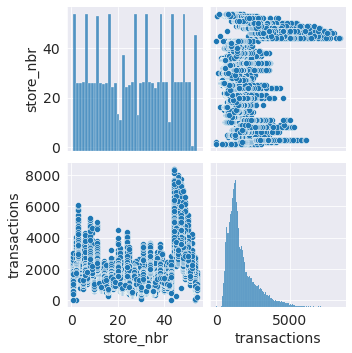

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df_transactions)
plt.show()

##**EDA** on the target variable (**sales**) and handling missing values, outliers, and correlation between features

>>These codes uses seaborn to plot the distribution of the target variable sales. It then checks for missing values, replaces them with the mean, handles outliers by removing values that are outside of 1.5 times the interquartile range (IQR), and finally, plots a heatmap of the correlation matrix to visualize the correlation between the features.

<ipython-input-54-c1b14e7d60f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['sales'])


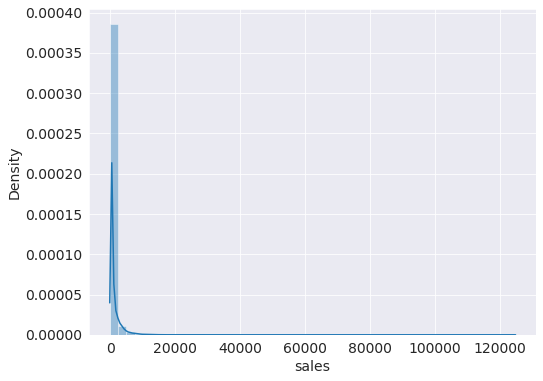

In [ ]:
# Check the distribution of the target variable (sales)
sns.distplot(df_train['sales'])
plt.show()

In [ ]:
# Check for missing values and handle them
print("Number of missing values in each column:")
print(df_train.isnull().sum())



Number of missing values in each column:
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [ ]:
# Check for outliers and handle them
Q1 = df_train['sales'].quantile(0.25)
Q3 = df_train['sales'].quantile(0.75)
IQR = Q3 - Q1
data = df_train[~((df_train['sales'] < (Q1 - 1.5 * IQR)) | (df_train['sales'] > (Q3 + 1.5 * IQR)))]

<ipython-input-32-4f188c28c9ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


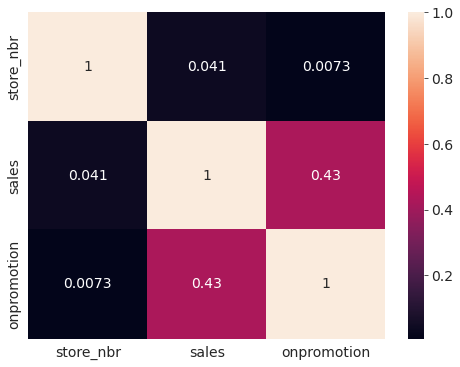

In [ ]:
# Check for correlation between features
corr = df_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df_oil.isnull().sum()
df_oil = df_oil.fillna(df_oil.mean())


<ipython-input-57-817fd7ce9dc5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_oil = df_oil.fillna(df_oil.mean())


In [ ]:
df_transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [ ]:
df_test.isnull().sum()

date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [ ]:
df_holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [ ]:
df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_holidays_events.duplicated().sum()

0

In [ ]:
df_oil.duplicated().sum()

0

In [ ]:
df_transactions.duplicated().sum()

0

In [ ]:
df_stores.duplicated().sum()

0

In [ ]:
df_merged = pd.concat([df_train, df_oil, df_stores, df_holidays_events, df_test, df_transactions], axis=0)


In [ ]:
df_merged.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,holiday_type,locale,transferred,transactions
0,2013-01-01 00:00:00,1.0,AUTOMOTIVE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 00:00:00,1.0,BABY_CARE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 00:00:00,1.0,BEAUTY,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 00:00:00,1.0,BEVERAGES,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 00:00:00,1.0,BOOKS,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged.shape

(3114510, 14)

In [ ]:
df_merged.dtypes

date             object
store_nbr       float64
family           object
sales           float64
onpromotion     float64
dcoilwtico      float64
city             object
state            object
store_type       object
cluster         float64
holiday_type     object
locale           object
transferred      object
transactions    float64
dtype: object

In [ ]:
df_merged.duplicated().sum()

1

In [ ]:
df_merged.reset_index()[df_merged.reset_index().duplicated()]

,index,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,holiday_type,locale,transferred,transactions


In [ ]:
df_merged.isnull().sum()


date                 54
store_nbr          1568
family            85110
sales            113622
onpromotion       85110
dcoilwtico      3113292
city            3114456
state           3114456
type            3114106
cluster         3114456
locale          3114160
locale_name     3114160
description     3114160
transferred     3114160
transactions    3031022
dtype: int64

In [ ]:
# Replace NaN values with mean of the column
df_merged['store_nbr'].fillna(df_merged['store_nbr'].mean(), inplace=True)

# Confirm that NaN values have been replaced
print("Number of NaN values in sales column after replacing:", df_merged['store_nbr'].isnull().sum())

Number of NaN values in sales column after replacing: 0


In [ ]:
# Replace NaN values with mean of the column
df_merged['onpromotion'].fillna(df_merged['onpromotion'].mean(), inplace=True)

# Confirm that NaN values have been replaced
print("Number of NaN values in sales column after replacing:", df_merged['onpromotion'].isnull().sum())

Number of NaN values in sales column after replacing: 0


In [ ]:
# Replace NaN values with mean of the column
df_merged['dcoilwtico'].fillna(df_merged['dcoilwtico'].mean(), inplace=True)

# Confirm that NaN values have been replaced
print("Number of NaN values in sales column after replacing:", df_merged['dcoilwtico'].isnull().sum())

Number of NaN values in sales column after replacing: 0


In [ ]:
# Replace NaN values with mean of the column
df_merged['cluster'].fillna(df_merged['cluster'].mean(), inplace=True)

# Confirm that NaN values have been replaced
print("Number of NaN values in sales column after replacing:", df_merged['cluster'].isnull().sum())

Number of NaN values in sales column after replacing: 0


In [ ]:
# Replace NaN values with mean of the column
df_merged['transactions'].fillna(df_merged['transactions'].mean(), inplace=True)

# Confirm that NaN values have been replaced
print("Number of NaN values in sales column after replacing:", df_merged['transactions'].isnull().sum())

Number of NaN values in sales column after replacing: 0


In [ ]:
df_merged.describe()

,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,sales_anamoly_score,sales_outliers
count,3.114510e+06,3.114510e+06,3.114510e+06,3.114510e+06,3.114510e+06,3.114510e+06,3.114510e+06,3.114510e+06
mean,2.748496e+01,3.577757e+02,2.643830e+00,6.771437e+01,8.481481e+00,1.694602e+03,4.242865e-01,9.986027e-01
std,1.558273e+01,1.081710e+03,1.216320e+01,4.976178e-01,1.936111e-02,1.577140e+02,9.341421e-02,5.284609e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00,-4.645221e-03,-1.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,6.771437e+01,8.481481e+00,1.694602e+03,3.822711e-01,1.000000e+00
50%,2.748496e+01,1.300000e+01,0.000000e+00,6.771437e+01,8.481481e+00,1.694602e+03,4.442036e-01,1.000000e+00
75%,4.100000e+01,2.470000e+02,0.000000e+00,6.771437e+01,8.481481e+00,1.694602e+03,5.127059e-01,1.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03,5.127059e-01,1.000000e+00


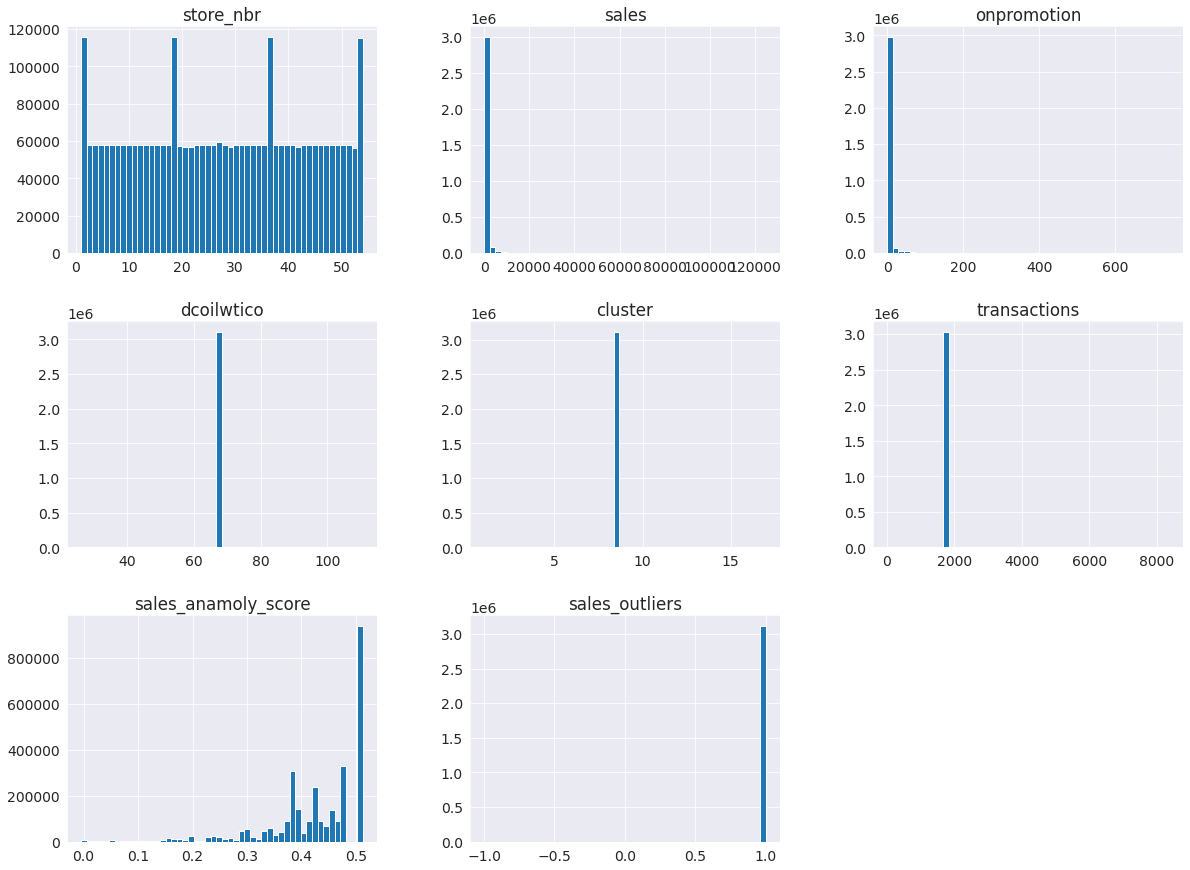

In [ ]:
# Plot histograms for each numerical feature
df_merged.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-124-9e9ee5222626>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merged.corr(), annot=True)


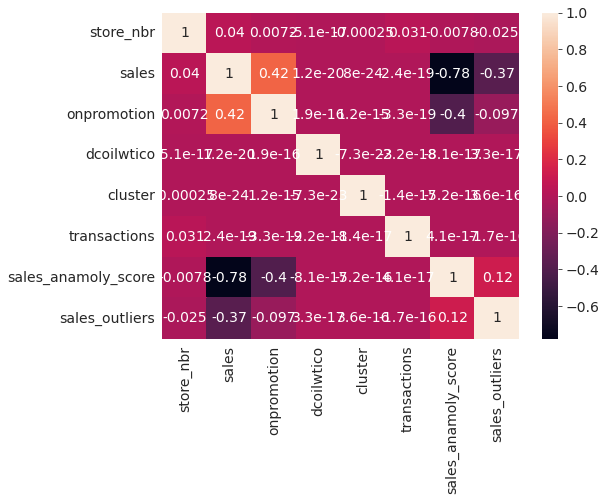

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(df_merged.corr(), annot=True)
plt.show()

##**Sales**

In [ ]:
# Sales 
sales_grouped  = df_train.groupby('date').agg({'sales':'sum'}).to_period("D")
sales_grouped['year']      = sales_grouped.index.year # year
sales_grouped['quarter']   = sales_grouped.index.quarter # Quarter 1 to 4
sales_grouped['month']     = sales_grouped.index.month # Month 1 to 12
sales_grouped['week']      = sales_grouped.index.week #  1 to 52
sales_grouped['dayofweek'] = sales_grouped.index.dayofweek  # Monday=0, Sunday=6
sales_grouped['dayofmonth']= sales_grouped.index.day  # day in month from 01 to 31
sales_grouped['dayofyear'] = sales_grouped.index.dayofyear # 1 to 365  or 366

###**Average sales by Month and by Quarter**

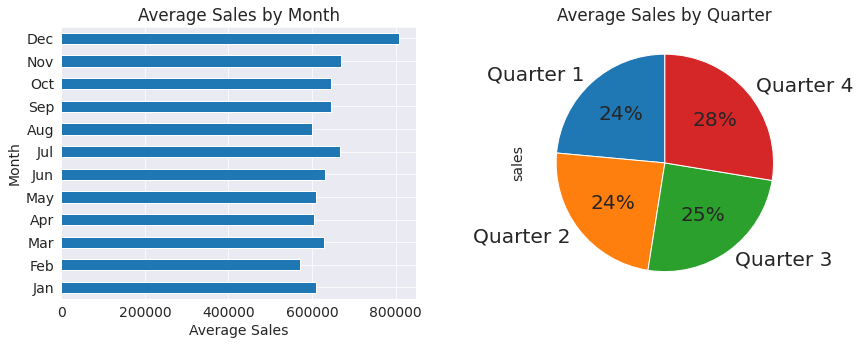

In [ ]:
figsize = (14,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)
sales_grouped.groupby(['month']).agg({'sales':'mean'}).plot(kind="barh",ax=ax1)
ax1.set(title="Average Sales by Month")
ax1.set(ylabel="Month", xlabel="Average Sales")
ax1.get_legend().remove()
labels1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax1.set_yticks(range(0,12))
ax1.set_yticklabels(labels1)

sales_grouped.groupby(['quarter']).agg({'sales':'mean'}).plot.pie(y="sales",
                                                                  ax=ax2, 
                                                                  legend=False, 
                                                                  autopct='%1.f%%',
                                                                  startangle=90, 
                                                                  labels=["Quarter 1","Quarter 2","Quarter 3","Quarter 4"], fontsize="x-large")
ax2.set(title="Average Sales by Quarter")
plt.show();

###**Average sales by day of the week and day of the month**

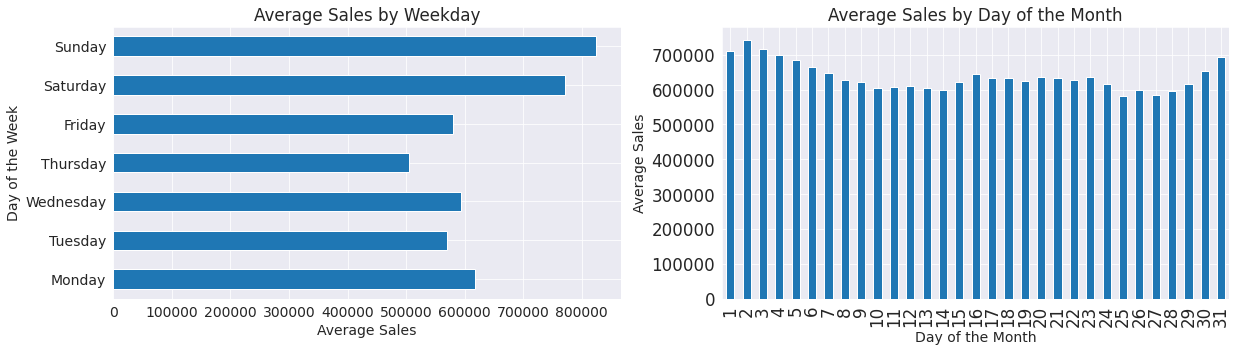

In [ ]:
figsize = (20,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)

sales_grouped.groupby(['dayofweek']).agg({'sales':'mean'}).plot.barh(ax=ax1)
ax1.set(title="Average Sales by Weekday")
ax1.set(ylabel="Day of the Week", xlabel="Average Sales")
ax1.get_legend().remove()
labels1 = ["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]
ax1.set_yticks(range(0,7))
ax1.set_yticklabels(labels1)

sales_grouped.groupby(['dayofmonth']).agg({'sales':'mean'}).plot.bar(ax=ax2,  fontsize="large")
ax2.set(title="Average Sales by Day of the Month")
ax2.set(ylabel="Average Sales", xlabel="Day of the Month")
ax2.get_legend().remove()
plt.show();

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [ ]:
sales_grouped  = df_merged.groupby('date').agg({'sales':'sum'}).to_period("D")
sales_grouped['year']      = sales_grouped.index.year # year
sales_grouped['quarter']   = sales_grouped.index.quarter # Quarter 1 to 4
sales_grouped['month']     = sales_grouped.index.month # Month 1 to 12
sales_grouped['week']      = sales_grouped.index.week #  1 to 52
sales_grouped['dayofweek'] = sales_grouped.index.dayofweek  # Monday=0, Sunday=6
sales_grouped['dayofmonth']= sales_grouped.index.day  # day in month from 01 to 31
sales_grouped['dayofyear'] = sales_grouped.index.dayofyear # 1 to 365  or 366

In [ ]:
# convert the date column to datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

# set the date as the index
df_merged.set_index('date', inplace=True)
if 'day_of_week' not in df_merged.columns:
    df_merged['day_of_week'] = df_merged.index.dayofweek
df_sales_dayofweek = df_merged[['sales', 'day_of_week']]

# extract the day of the week
df_merged['day_of_week'] = df_merged.index.dayofweek

# create a new DataFrame with just the sales and day_of_week columns
df_sales_dayofweek = df_merged[['sales', 'day_of_week']]

# group the data by the day of the week
df_grouped = df_sales_dayofweek.groupby(['day_of_week']).mean()

# reset the index
df_grouped.reset_index(inplace=True)

# rename the columns
df_grouped.columns = ['day_of_week', 'sales_mean']

# create a time series using the sales mean for each day of the week
ts = df_grouped['sales_mean']

# fit the ARIMA model
model = sm.tsa.ARIMA(ts, order=(1,0,1))
model_fit = model.fit()

# perform sales forecasting for the next 7 days
forecast = model_fit.forecast(steps=7)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/deterministic.py:1451: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a futu

ValueError: ignored

In [ ]:
# convert the date column to datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

##**Feature Engineering**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Check for NaN values in sales column
print("Number of NaN values in sales column:", df_merged['sales'].isnull().sum())

Number of NaN values in sales column: 0


In [ ]:
# Replace NaN values with mean of the column
df_merged['sales'].fillna(df_merged['sales'].mean(), inplace=True)

In [ ]:
# Confirm that NaN values have been replaced
print("Number of NaN values in sales column after replacing:", df_merged['sales'].isnull().sum())

Number of NaN values in sales column after replacing: 0


In [ ]:
# Fit the isolation forest model
sales_column = df_merged['sales'].values.reshape(-1, 1)
isolation_forest = IsolationForest(n_estimators=100, contamination=0.001)
isolation_forest.fit(sales_column)


IsolationForest(contamination=0.001)

In [ ]:
df_merged["sales_anamoly_score"] = isolation_forest.decision_function(sales_column)
(df_merged["sales_anamoly_score"] < 0).sum()

2568

In [ ]:
df_merged["sales_outliers"] = isolation_forest.predict(sales_column)
(df_merged["sales_outliers"] == -1).sum()

2568

In [ ]:
print("The Outliers in the Sales dataset are in the range of ",df_merged[df_merged["sales_outliers"] == -1]["sales"].min(),df_merged[df_merged["sales_outliers"] == -1]["sales"].max())

The Outliers in the Sales dataset are in the range of  12510.0 124717.0


In [ ]:
merged_df = df_merged[df_merged["sales_outliers"] == 1]

In [ ]:
# Removing Isolation Forest columns
df_merged.drop(['sales_anamoly_score','sales_outliers'],axis = 1, inplace=True)
df_merged.shape

(3114510, 14)

In [ ]:
df_merged.shape

(3114510, 14)

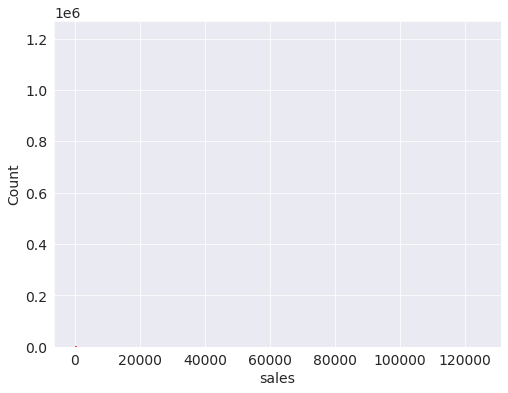

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df_merged["sales"], color='r');